<a href="https://colab.research.google.com/github/rhearjethvani/MITFutureMakers/blob/main/classifyingMNISTDatasetsCNN/classifyingMNISTDatasetsCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [7]:
def load_dataset():
  (trainX, trainY), (testX, testY) = mnist.load_data()

  trainX = trainX.reshape((-1, 28, 28, 1))
  testX = testX.reshape((-1, 28, 28, 1))

  trainY = to_categorical(trainY)
  testY = to_categorical(testY)

  return trainX, trainY, testX, testY

In [9]:
def prep_pixels(train, test):
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')

  train_norm = train_norm/255.0
  test_norm = test_norm/255.0

  return train_norm, test_norm

In [10]:
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))

  opt = SGD(learning_rate=0.1, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  
  return model

In [18]:
def evaluate_model(dataX, dataY, n_folds=5):
  scores, histories = list(), list()
  kfold = KFold(n_folds, shuffle=True, random_state=1)

  for train_ix, test_ix in kfold.split(dataX):
    model = define_model()
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %0.3f' % (acc*100.0))
    scores.append(acc)
    histories.append(history)
    return scores, histories

In [19]:
def summarize_diagnostics(histories):
  for i in range(len(histories)):
    pyplot.subplot(2, 1, 1)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(histories[i].history['loss'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
    pyplot.subplot(2, 1, 2)
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    pyplot.show()

In [20]:
def summarize_performance(scores):
  print('Accuracy: mean=%0.3f std=%0.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
  pyplot.boxplot(scores)
  pyplot.show()

In [21]:
def run_test_harness():
  trainX, trainY, testX, testY = load_dataset()
  trainX, testX = prep_pixels(trainX, testX)
  scores, histories = evaluate_model(trainX, trainY)
  summarize_diagnostics(histories)
  summarize_performance(scores)

> 96.717


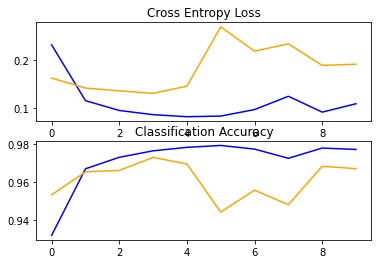

Accuracy: mean=96.717 std=0.000, n=1


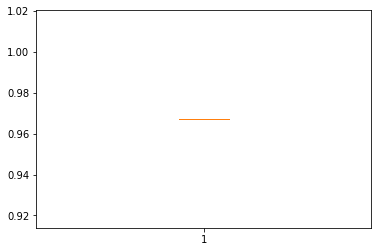

In [23]:
run_test_harness()